In [1]:
!conda install nltk -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nltk-3.3.0                 |           py36_0         2.0 MB
    conda-4.5.4                |           py36_0         1.0 MB
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

    nltk:  3.3.0-py36_0

The following packages will be UPDATED:

    conda: 4.5.2-py36_0 --> 4.5.4-py36_0


nltk 3.3.0############################################################## | 100% 
conda 4.5.4############################################################# | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import nltk
from nltk import word_tokenize

In [5]:
from nltk.stem.snowball import RussianStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
stemmer = RussianStemmer()

In [14]:
import os
import collections

author_dir = 'Gogol'
counter = collections.Counter()
N = 0
for fname in os.listdir(author_dir):
    filename = os.path.join(author_dir, fname)
    with open(filename, 'r', encoding="utf-8") as f:
        text = f.read()
    tokens = word_tokenize(text)
    N += len(tokens)
    stemmed = [stemmer.stem(token) for token in tokens if token not in [",", ".", "!", "-", "'", "?", ":"]]
    counter.update(stemmed)

In [15]:
N

279675

In [16]:
distr_dict = counter.most_common(n=5000)

In [17]:
distr_dict

[('и', 8993),
 ('в', 5185),
 ('не', 4958),
 ('на', 3653),
 ('что', 3504),
 ('он', 3192),
 ('как', 2974),
 ('был', 2350),
 ('с', 2331),
 ('``', 2104),
 ('так', 2087),
 ("'", 2022),
 (';', 1949),
 ('эт', 1791),
 ('а', 1726),
 ('--', 1639),
 ('все', 1563),
 ('я', 1534),
 ('ег', 1501),
 ('уж', 1208),
 ('сво', 1203),
 ('котор', 1116),
 ('за', 1100),
 ('но', 1049),
 ('по', 1037),
 ('да', 1035),
 ('же', 1026),
 ('у', 1016),
 ('к', 1003),
 ('сказа', 994),
 ('бы', 993),
 ('сам', 967),
 ('из', 915),
 ('тольк', 894),
 ('ещ', 804),
 ('ты', 787),
 ('то', 750),
 ('друг', 743),
 ('ни', 731),
 ('...', 729),
 ('говор', 728),
 ('вот', 697),
 ('рук', 665),
 ('одн', 665),
 ('чтоб', 634),
 ('теб', 624),
 ('ем', 624),
 ('себ', 615),
 ('нет', 609),
 ('от', 579),
 ('е', 574),
 ('мо', 541),
 ('голов', 540),
 ('ли', 520),
 ('их', 496),
 ('вы', 488),
 ('дел', 482),
 ('человек', 482),
 ('ил', 475),
 ('нег', 465),
 ('мне', 461),
 ('пот', 454),
 ('когд', 454),
 ('есл', 437),
 ('ну', 425),
 ('слов', 423),
 ('о', 417

Text(0,0.5,'Frequency')

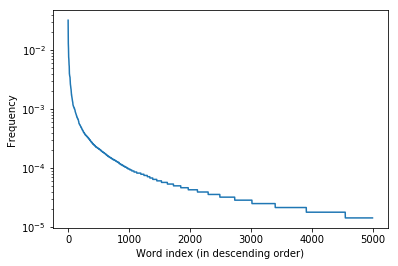

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.semilogy([x[1]/N for x  in distr_dict])
plt.xlabel("Word index (in descending order)")
plt.ylabel("Frequency")

This really looks like Zipf's law. 

In [35]:
import json
with open('freqs.json', 'w') as outfile:
    json.dump(distr_dict, outfile)

Now let us compare with some other student. I here use file from Mark Vinogradov

In [29]:
with open('tolstaja_freq.json') as f:
    freq2 = json.load(f)

Text(0,0.5,'Frequency')

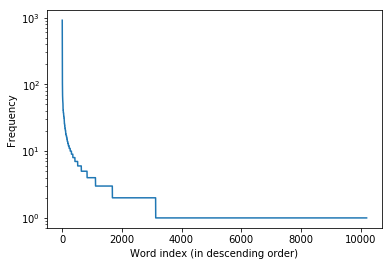

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.semilogy(sorted(list(freq2.values()), reverse=True))
plt.xlabel("Word index (in descending order)")
plt.ylabel("Frequency")

In [52]:
arr2 = list(reversed(sorted(freq2.items(), key=lambda x: x[1])))[:5000]
arr2

[('', 910),
 ('он', 368),
 ('она', 311),
 ('весь', 205),
 ('я', 192),
 ('бывший', 159),
 ('ты', 103),
 ('бывшее', 80),
 ('слово', 79),
 ('уже', 75),
 ('там', 70),
 ('рука', 68),
 ('нет', 63),
 ('человек', 59),
 ('они', 59),
 ('дядя', 59),
 ('где', 58),
 ('нога', 57),
 ('кто', 56),
 ('мы', 53),
 ('свой', 53),
 ('чёрный', 52),
 ('мамочка', 52),
 ('женщина', 52),
 ('могущий', 51),
 ('дверь', 46),
 ('год', 45),
 ('нея', 43),
 ('петя', 42),
 ('алексей', 41),
 ('лицо', 41),
 ('этот', 41),
 ('тоже', 41),
 ('глаз', 40),
 ('можно', 39),
 ('вы', 39),
 ('вера', 39),
 ('нина', 39),
 ('хотящий', 38),
 ('себя', 38),
 ('ничто', 38),
 ('день', 37),
 ('бывшая', 37),
 ('соня', 37),
 ('очень', 36),
 ('ночь', 36),
 ('язык', 36),
 ('тот', 35),
 ('дом', 35),
 ('ребёнок', 34),
 ('потом', 34),
 ('их', 33),
 ('петрович', 33),
 ('такой', 33),
 ('надо', 33),
 ('знающий', 33),
 ('время', 33),
 ('василиевна', 32),
 ('теперь', 32),
 ('окно', 32),
 ('марьиванна', 31),
 ('эта', 31),
 ('смотрящий', 31),
 ('голова', 31

In [58]:
arr2 = [(stemmer.stem(x[0]), x[1]) for x in arr2]
arr2

[('', 910),
 ('он', 368),
 ('он', 311),
 ('ве', 205),
 ('я', 192),
 ('бывш', 159),
 ('ты', 103),
 ('бывш', 80),
 ('слов', 79),
 ('уж', 75),
 ('там', 70),
 ('рук', 68),
 ('нет', 63),
 ('человек', 59),
 ('он', 59),
 ('дяд', 59),
 ('где', 58),
 ('ног', 57),
 ('кто', 56),
 ('мы', 53),
 ('сво', 53),
 ('черн', 52),
 ('мамочк', 52),
 ('женщин', 52),
 ('могущ', 51),
 ('двер', 46),
 ('год', 45),
 ('не', 43),
 ('пет', 42),
 ('алекс', 41),
 ('лиц', 41),
 ('этот', 41),
 ('тож', 41),
 ('глаз', 40),
 ('можн', 39),
 ('вы', 39),
 ('вер', 39),
 ('нин', 39),
 ('хотя', 38),
 ('себ', 38),
 ('ничт', 38),
 ('ден', 37),
 ('бывш', 37),
 ('сон', 37),
 ('очен', 36),
 ('ноч', 36),
 ('язык', 36),
 ('тот', 35),
 ('дом', 35),
 ('ребенок', 34),
 ('пот', 34),
 ('их', 33),
 ('петрович', 33),
 ('так', 33),
 ('над', 33),
 ('знающ', 33),
 ('врем', 33),
 ('василиевн', 32),
 ('тепер', 32),
 ('окн', 32),
 ('марьиван', 31),
 ('эт', 31),
 ('смотря', 31),
 ('голов', 31),
 ('себ', 31),
 ('мам', 30),
 ('так', 30),
 ('тут', 30),


Actually, one of the ways to compare is to run statistical test. Like Chi-Squareg oodness of fit test.

In [59]:
w_ind = dict(zip([x[0] for x in arr2], range(len(arr2))))
w_ind

{'': 0,
 'он': 246,
 'ве': 3,
 'я': 4,
 'бывш': 42,
 'ты': 6,
 'слов': 8,
 'уж': 73,
 'там': 3879,
 'рук': 11,
 'нет': 12,
 'человек': 13,
 'дяд': 15,
 'где': 16,
 'ног': 17,
 'кто': 18,
 'мы': 19,
 'сво': 94,
 'черн': 860,
 'мамочк': 22,
 'женщин': 23,
 'могущ': 24,
 'двер': 25,
 'год': 2436,
 'не': 27,
 'пет': 28,
 'алекс': 29,
 'лиц': 30,
 'этот': 31,
 'тож': 32,
 'глаз': 33,
 'можн': 34,
 'вы': 2868,
 'вер': 36,
 'нин': 37,
 'хотя': 38,
 'себ': 64,
 'ничт': 40,
 'ден': 41,
 'сон': 4293,
 'очен': 44,
 'ноч': 3135,
 'язык': 46,
 'тот': 3447,
 'дом': 340,
 'ребенок': 49,
 'пот': 393,
 'их': 51,
 'петрович': 52,
 'так': 139,
 'над': 54,
 'знающ': 55,
 'врем': 56,
 'василиевн': 57,
 'тепер': 58,
 'окн': 59,
 'марьиван': 60,
 'эт': 61,
 'смотря': 62,
 'голов': 63,
 'мам': 65,
 'тут': 67,
 'птиц': 68,
 'говоря': 2915,
 'жизн': 70,
 'русск': 2231,
 'мир': 72,
 'друг': 616,
 'паш': 75,
 'хорош': 2074,
 'комнат': 77,
 'идущ': 78,
 'одн': 156,
 'сторон': 3798,
 'девочк': 81,
 'стол': 1135,
 '

In [60]:
words = [x[0] for x in distr_dict]

In [61]:
i = len(arr2)
freq2_set = set(list(w_ind.keys()))
for w in words:
    if w not in freq2_set:
        w_ind.update({w: i})
        i += 1

In [62]:
i

8429

This means that only about 1.5 thousand of words are common, thus we have no need in running statistical tests.

To determine authorship I propose to train a classifier which will takes as input one-hot encoded vectors representing words and frequency of every such word. Or just run statustical tests against every author's corpus.